In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


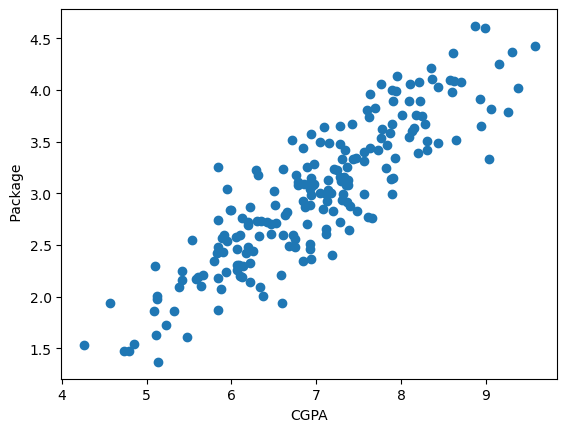

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel(" Package")
plt.show()

In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [10]:
# spliting the data

x=df.iloc[:,0:1] # inde
y=df.iloc[:,-1]

In [11]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [12]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=101)

In [15]:
# building simple linear regrssion model
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


In [16]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [20]:
coef=linear.coef_
coef

array([0.56572694])

In [21]:
inter=linear.intercept_
inter

-0.9719681201160628

In [22]:
# CGPA = 9.8, 7.3, 6.5
salary_9_8 = coef*9.8+inter
salary_9_8

array([4.57215591])

In [23]:
salary_7_3 = coef*7.3+inter
salary_7_3

array([3.15783856])

In [24]:
# PRediction model
salary_pred=linear.predict(x_test)
salary_pred

array([2.36582084, 3.42373022, 3.61042011, 2.65999885, 1.91889655,
       3.20875398, 2.9089187 , 2.90326143, 2.33187722, 2.94851959,
       3.31058483, 3.88196904, 3.16915309, 3.6669928 , 2.85234601,
       3.71225096, 3.14652402, 3.18046763, 2.54685346, 3.23138306,
       2.94851959, 3.5199038 , 3.01074955, 2.12821552, 3.32755664,
       4.44769598, 2.39410718, 3.15218129, 3.06732224, 3.45201656,
       4.08563074, 2.45067988, 3.05035044, 2.5015953 , 2.92589051,
       2.96549139, 3.17481036, 2.36016357, 2.39410718, 2.52988165,
       2.89760416, 3.4633311 , 2.51856711, 2.705257  , 3.34452845,
       2.95417686, 2.75617243, 3.91025539, 2.95417686, 3.12955221])

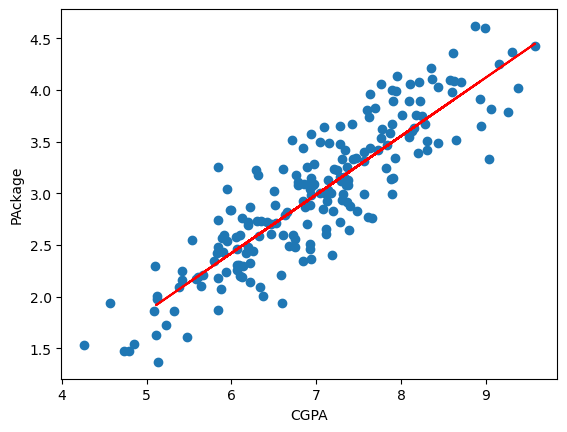

In [26]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_test, salary_pred, color='red')
plt.xlabel('CGPA')
plt.ylabel('PAckage')
plt.show()

In [28]:
# Evaluation model
from sklearn.metrics import r2_score

In [29]:
print("Accuracy : ", r2_score(y_test, salary_pred))

Accuracy :  0.7222834069394974
